In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('Harvard_preprocessed.csv')

In [4]:
df.head()

,course_id,userid_DI,registered,viewed,explored,certified,grade,nevents,ndays_act,nchapters,nforum_posts,Age,LoE_DI_labels,gender_labels
0,HarvardX/CB22x/2013_Spring,MHxPC130442623,1,0,0,0,0.00,1,9,1,0,22,0,1
1,HarvardX/CB22x/2013_Spring,MHxPC130275857,1,0,0,0,0.00,1,16,1,0,23,0,1
2,HarvardX/CB22x/2013_Spring,MHxPC130539455,1,1,0,0,0.00,42,6,3,0,23,0,1
3,HarvardX/CB22x/2013_Spring,MHxPC130088379,1,1,0,0,0.00,70,3,3,0,23,0,1
4,HarvardX/CB22x/2013_Spring,MHxPC130024894,1,1,0,0,0.07,175,9,7,0,23,0,1


In [5]:
c=df.pop('grade')
df['grade']=c

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309638 entries, 0 to 309637
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   course_id      309638 non-null  object 
 1   userid_DI      309638 non-null  object 
 2   registered     309638 non-null  int64  
 3   viewed         309638 non-null  int64  
 4   explored       309638 non-null  int64  
 5   certified      309638 non-null  int64  
 6   nevents        309638 non-null  int64  
 7   ndays_act      309638 non-null  int64  
 8   nchapters      309638 non-null  int64  
 9   nforum_posts   309638 non-null  int64  
 10  Age            309638 non-null  int64  
 11  LoE_DI_labels  309638 non-null  int64  
 12  gender_labels  309638 non-null  int64  
 13  grade          309638 non-null  float64
dtypes: float64(1), int64(11), object(2)
memory usage: 33.1+ MB


In [7]:
df = df.drop(['course_id','userid_DI'],axis = 1)
df.head()

,registered,viewed,explored,certified,nevents,ndays_act,nchapters,nforum_posts,Age,LoE_DI_labels,gender_labels,grade
0,1,0,0,0,1,9,1,0,22,0,1,0.00
1,1,0,0,0,1,16,1,0,23,0,1,0.00
2,1,1,0,0,42,6,3,0,23,0,1,0.00
3,1,1,0,0,70,3,3,0,23,0,1,0.00
4,1,1,0,0,175,9,7,0,23,0,1,0.07


In [8]:
#Identify input and target columns
input_cols,target_cols=df.columns[:-1],df.columns[-1]
input_df,targets=df[input_cols].copy(),df[target_cols].copy()

In [9]:
cols1=input_df.columns[:9]

In [10]:
scaler=MinMaxScaler().fit(input_df[cols1])
input_df[cols1]=scaler.transform(input_df[cols1])

In [11]:
input_df.head()

,registered,viewed,explored,certified,nevents,ndays_act,nchapters,nforum_posts,Age,LoE_DI_labels,gender_labels
0,0.0,0.0,0.0,0.0,0.000000,0.045714,0.000000,0.0,0.268293,0,1
1,0.0,0.0,0.0,0.0,0.000000,0.085714,0.000000,0.0,0.280488,0,1
2,0.0,1.0,0.0,0.0,0.000934,0.028571,0.060606,0.0,0.280488,0,1
3,0.0,1.0,0.0,0.0,0.001573,0.011429,0.060606,0.0,0.280488,0,1
4,0.0,1.0,0.0,0.0,0.003965,0.045714,0.181818,0.0,0.280488,0,1


In [12]:
cols2=input_df.columns[9:]

In [13]:
#input_df[cols2]

In [14]:
#For categorical columns
one_hot_encoded_data = pd.get_dummies(input_df, columns = ['LoE_DI_labels', 'gender_labels'])
print(one_hot_encoded_data)

        registered  viewed  explored  certified   nevents  ndays_act  \
0              0.0     0.0       0.0        0.0  0.000000   0.045714   
1              0.0     0.0       0.0        0.0  0.000000   0.085714   
2              0.0     1.0       0.0        0.0  0.000934   0.028571   
3              0.0     1.0       0.0        0.0  0.001573   0.011429   
4              0.0     1.0       0.0        0.0  0.003965   0.045714   
...            ...     ...       ...        ...       ...        ...   
309633         0.0     1.0       0.0        0.0  0.000433   0.000000   
309634         0.0     1.0       0.0        0.0  0.001709   0.000000   
309635         0.0     0.0       0.0        0.0  0.000023   0.000000   
309636         0.0     1.0       0.0        0.0  0.000820   0.011429   
309637         0.0     0.0       0.0        0.0  0.000000   0.000000   

        nchapters  nforum_posts       Age  LoE_DI_labels_0  LoE_DI_labels_1  \
0        0.000000           0.0  0.268293               

In [15]:
input_df = one_hot_encoded_data

In [16]:
input_df.shape

(309638, 17)

In [17]:
X_train,X_test,y_train,y_test=train_test_split(input_df,targets,test_size=0.25,random_state=42)

In [18]:
X_train.head()

,registered,viewed,explored,certified,nevents,ndays_act,nchapters,nforum_posts,Age,LoE_DI_labels_0,LoE_DI_labels_1,LoE_DI_labels_2,LoE_DI_labels_3,LoE_DI_labels_4,gender_labels_0,gender_labels_1,gender_labels_2
172467,0.0,1.0,0.0,0.0,0.000046,0.000000,0.000000,0.0,0.182927,0,0,1,0,0,0,1,0
296743,0.0,1.0,0.0,0.0,0.006609,0.011429,0.030303,0.0,0.292683,1,0,0,0,0,1,0,0
289027,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.304878,1,0,0,0,0,0,1,0
44842,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.378049,1,0,0,0,0,0,1,0
256339,0.0,1.0,1.0,0.0,0.086146,0.222857,0.424242,0.0,0.353659,1,0,0,0,0,1,0,0


In [29]:
y_train.head()

172467    0.00
296743    0.02
289027    0.00
44842     0.00
256339    0.45
Name: grade, dtype: float64

The first model we are implementing is the Linear regression model. The easiest way to examine feature importances is by examining the model’s coefficients. 

In [33]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.coef_
})
importances = importances.sort_values(by='Importance', ascending=False)

In [35]:
importances

,Attribute,Importance
14,gender_labels_0,1.766878e+11
15,gender_labels_1,1.766878e+11
16,gender_labels_2,1.766878e+11
4,nevents,9.730879e-01
3,certified,7.422923e-01
5,ndays_act,1.561952e-01
6,nchapters,3.675669e-02
2,explored,2.588616e-02
1,viewed,1.216659e-03
0,registered,0.000000e+00


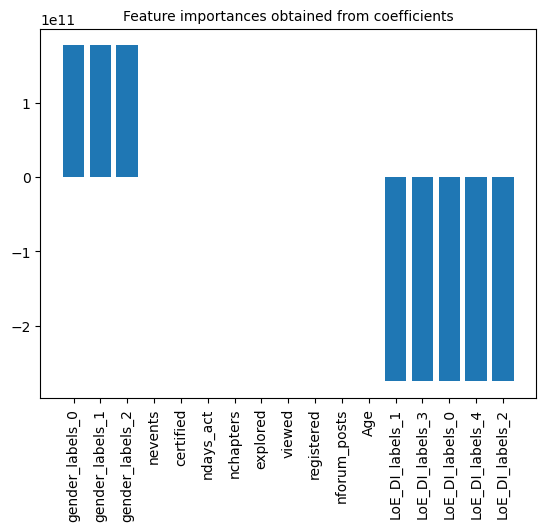

In [38]:
plt.bar(x=importances['Attribute'], height=importances['Importance'])
plt.title('Feature importances obtained from coefficients', size=10)
plt.xticks(rotation='vertical')
plt.show()

In [40]:
from xgboost import XGBRegressor

model = XGBRegressor()
model.fit(X_train, y_train)
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)

In [41]:
importances

,Attribute,Importance
3,certified,0.958604
2,explored,0.015790
4,nevents,0.008875
6,nchapters,0.006100
5,ndays_act,0.001677
14,gender_labels_0,0.001570
8,Age,0.001517
13,LoE_DI_labels_4,0.001301
12,LoE_DI_labels_3,0.001138
10,LoE_DI_labels_1,0.001022


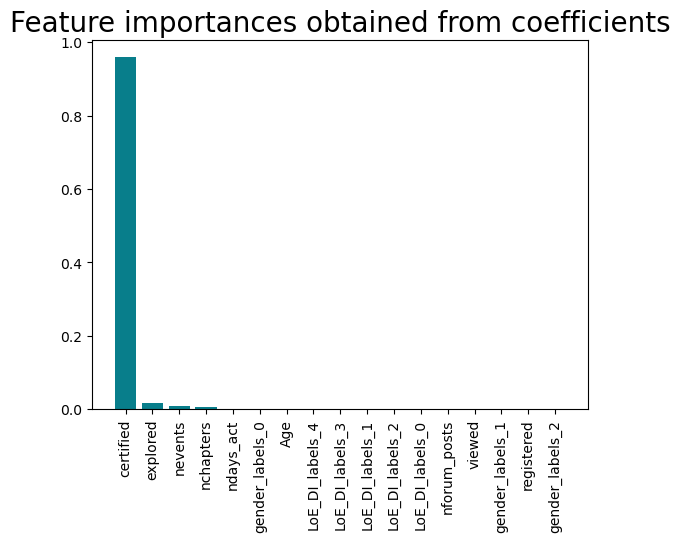

In [32]:
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

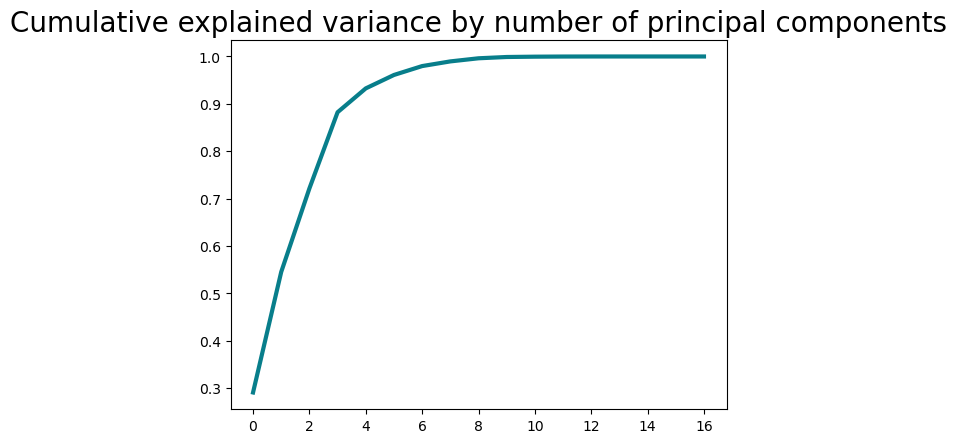

In [42]:
from sklearn.decomposition import PCA

pca = PCA().fit(X_train)

plt.plot(pca.explained_variance_ratio_.cumsum(), lw=3, color='#087E8B')
plt.title('Cumulative explained variance by number of principal components', size=20)
plt.show()

In [43]:
loadings = pd.DataFrame(
    data=pca.components_.T * np.sqrt(pca.explained_variance_), 
    columns=[f'PC{i}' for i in range(1, len(X_train.columns) + 1)],
    index=X_train.columns
)
loadings.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17
registered,0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000e+00,0.000000e+00,0.000000e+00,0.0
viewed,-0.060771,-0.059155,0.483205,-0.029414,-0.050728,-0.002171,-0.001097,0.000355,-0.000404,-0.001998,-0.000084,-0.000006,-0.000002,-3.241137e-07,1.413117e-31,-1.177568e-31,0.0
explored,-0.013364,-0.010608,0.077830,0.005029,0.226836,-0.001922,0.001206,-0.049358,-0.000915,-0.016843,-0.000556,0.000258,-0.000048,-9.732625e-07,-1.490766e-30,-6.705105e-32,0.0
certified,0.000933,-0.003190,0.027919,0.004854,0.091536,0.000073,0.000321,0.105488,0.000572,-0.016207,-0.003050,0.000132,-0.000186,5.139752e-08,5.608032e-30,8.778867e-32,0.0
nevents,0.000678,-0.000160,0.003447,0.001091,0.007700,0.000230,-0.000522,0.004113,-0.000078,0.000653,0.007241,0.000062,0.011116,2.385989e-06,-1.379505e-29,-6.003666e-30,0.0


Three different techniques were used to determine feature importance. With linear regression we found that demographic elements like gender and Level of education play a role in determining the final grades received. However, the tree based technique called XGBoost suggests that student engagement related features like whether student explored the course content or not, chapters viewed etc. also play a role. The most significant feature was found to be 'certified' which stands for - anyone
who earned a certificate. This makes sense because those who did not receive certificates most likely did not continue the course.Finally PCA shows that engagement related features like viewed, explored and interactions with the course (nevents) explain most of the variation in the data